<a href="https://colab.research.google.com/github/shivaniamrutkar/NewCodingBot/blob/main/Copy_of_internship_project_IBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. DATASET SELECTION

In [5]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Show first few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 2.DATA PREPROCESSING


In [6]:
#check for missing values
#check for null values
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [3]:
# feature scaling


In [7]:
from sklearn.preprocessing import StandardScaler

X = df.drop('MEDV', axis=1)  # Features
y = df['MEDV']               # Target

# Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
3. # MODEL SELECTION

In [8]:
# linear regresion
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
4. # MODEL EVALUATION

In [9]:
#predictions and performance metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

MAE: 3.19
RMSE: 4.93
R² Score: 0.67


In [ ]:
5.# BASIC HYPERPARAMERTER TUNING

In [10]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_ridge_pred = ridge_model.predict(X_test_scaled)

# Evaluation
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))
print(f'Ridge RMSE: {ridge_rmse:.2f}')

Ridge RMSE: 4.93


In [ ]:
6. #VISUALIZATION

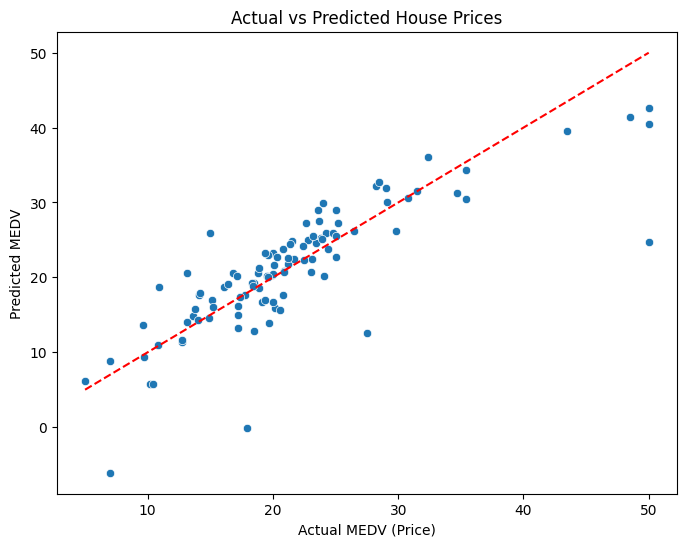

In [11]:
#predicted vs actual prices
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual MEDV (Price)")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()